In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 40

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

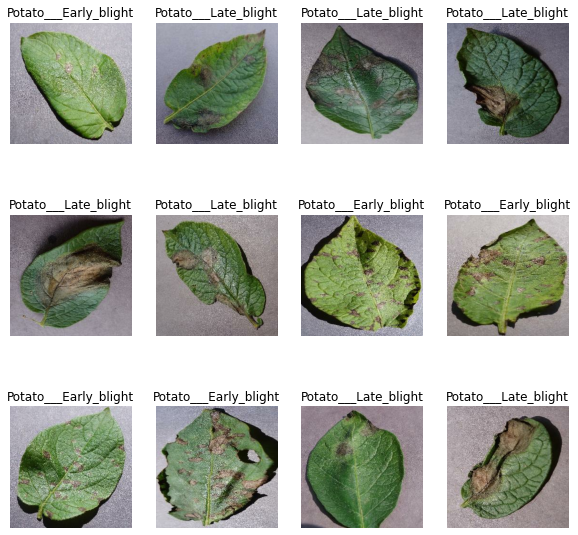

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [7]:
len(dataset)

68

In [8]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [9]:
train_ds = dataset.take(54)
len(train_ds)

54

In [10]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [11]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [12]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8,val_split=0.1, test_split= 0.1, shuffle=True, shuffle_size=10000 ):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(train_split *ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,test_ds,val_ds

In [14]:
train_ds, test_ds, val_ds = get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds)

54

In [16]:
len(val_ds)

6

In [17]:
len(test_ds)

8

In [18]:

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [19]:

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [20]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [43]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

NotImplementedError: Cannot convert a symbolic Tensor (sequential_1/random_rotation/rotation_matrix/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [21]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (32, 30, 30, 64)         

In [22]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [46]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (32, 30, 30, 64)         

In [25]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size=BATCH_SIZE,
    verbose = 1,
    validation_data=val_ds
)

Epoch 1/40
54/54 [==============================] - 79s 1s/step - loss: 0.8936 - accuracy: 0.4977 - val_loss: 0.8593 - val_accuracy: 0.5833
Epoch 2/40
54/54 [==============================] - 78s 1s/step - loss: 0.7248 - accuracy: 0.6719 - val_loss: 0.8186 - val_accuracy: 0.4896
Epoch 3/40
54/54 [==============================] - 74s 1s/step - loss: 0.6258 - accuracy: 0.7361 - val_loss: 0.7422 - val_accuracy: 0.6198
Epoch 4/40
54/54 [==============================] - 71s 1s/step - loss: 0.4431 - accuracy: 0.8200 - val_loss: 0.6517 - val_accuracy: 0.7396
Epoch 5/40
54/54 [==============================] - 71s 1s/step - loss: 0.3120 - accuracy: 0.8750 - val_loss: 0.1941 - val_accuracy: 0.9271
Epoch 6/40
54/54 [==============================] - 71s 1s/step - loss: 0.3605 - accuracy: 0.8524 - val_loss: 0.3003 - val_accuracy: 0.8802
Epoch 7/40
54/54 [==============================] - 74s 1s/step - loss: 0.2478 - accuracy: 0.9086 - val_loss: 0.1917 - val_accuracy: 0.9323
Epoch 8/40
54/54 [==

In [30]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 2s 211ms/step - loss: 0.0312 - accuracy: 0.9883


In [31]:
scores

[0.031240811571478844, 0.98828125]

In [33]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 54}

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
history.history['accuracy']

[0.49768519401550293,
 0.671875,
 0.7361111044883728,
 0.8200231194496155,
 0.875,
 0.8524305820465088,
 0.9085648059844971,
 0.8993055820465088,
 0.9265046119689941,
 0.9241898059844971,
 0.9241898059844971,
 0.9444444179534912,
 0.9589120149612427,
 0.9675925970077515,
 0.96875,
 0.9513888955116272,
 0.9652777910232544,
 0.9820601940155029,
 0.9872685074806213,
 0.9895833134651184,
 0.9901620149612427,
 0.9820601940155029,
 0.9612268805503845,
 0.9861111044883728,
 0.9826388955116272,
 0.9942129850387573,
 0.9994212985038757,
 1.0,
 0.9907407164573669,
 0.9901620149612427,
 0.9901620149612427,
 0.9768518805503845,
 0.9809027910232544,
 0.9895833134651184,
 0.9994212985038757,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

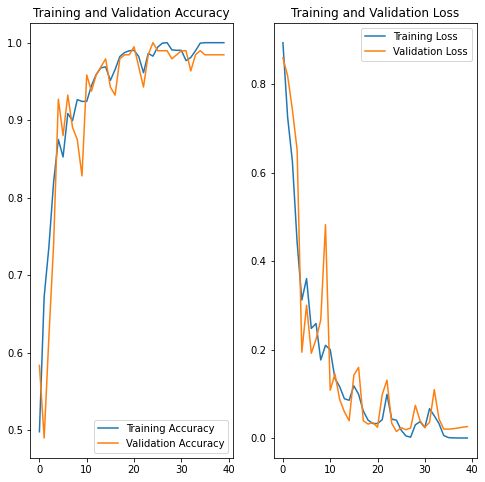

In [39]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

First image to predict
Actual label: Potato___Late_blight
Predicted label: Potato___Late_blight


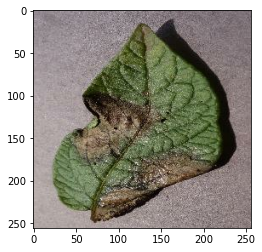

In [53]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])

In [67]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch
    
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2 )
    return predicted_class, confidence
    

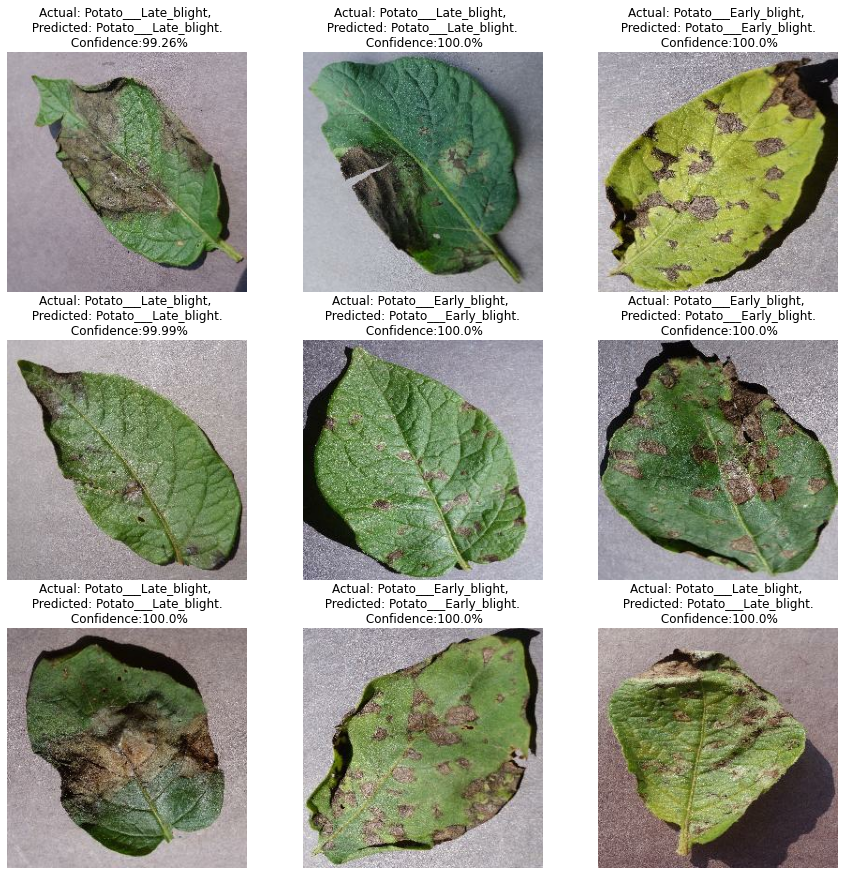

In [68]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3 , i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}. \n Confidence:{confidence}%")
        plt.axis("off")

In [74]:

model_version = 2
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


In [76]:
import os
model_version = max([int(i) for i in os.listdir("../models") + [0] ]) +1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/4\assets
